<a href="https://colab.research.google.com/github/P-WANIII/covid-19-forecast/blob/main/Covid_forecast_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
path="/content/drive/MyDrive/Colab Notebooks/Smartknower/covid_19_india.csv"

In [3]:
data=pd.read_csv(path)
data.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)
data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
data.rename(columns={"State/UnionTerritory":"State"},inplace= True)
data.head()

,Date,State,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
latest_dates= data[data['Date']==data['Date'].max()]
latest_dates.head()

,Date,State,Cured,Deaths,Confirmed
16814,2021-07-07,Andaman and Nicobar Islands,7343,128,7487
16815,2021-07-07,Andhra Pradesh,1861937,12898,1908065
16816,2021-07-07,Arunachal Pradesh,34525,181,37879
16817,2021-07-07,Assam,493306,4717,522267
16818,2021-07-07,Bihar,711913,9612,722746


In [7]:
total_date_wise_cases= data.groupby("Date")["Cured","Deaths","Confirmed"].sum()
total_date_wise_cases.tail(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Cured,Deaths,Confirmed
Date,,,
2021-05-19,21986363,283248,25496330
2021-05-20,22355440,287122,25772440
2021-05-21,22712735,291331,26031991
2021-05-22,23070365,295525,26289290
2021-05-23,23425467,299266,26530132
2021-05-24,23728011,303720,26752447
2021-05-25,24054861,307231,26948874
2021-05-26,24350816,311388,27157795
2021-05-27,24633951,315235,27369093


In [8]:
#forecast of 'number of deaths' - 30 days
from fbprophet import Prophet
confirmed= data.groupby('Date')['Deaths'].sum().reset_index()
confirmed.tail()

,Date,Deaths
520,2021-07-03,401050
521,2021-07-04,402005
522,2021-07-05,402728
523,2021-07-06,403281
524,2021-07-07,404211


In [9]:
confirmed.rename(columns={"Date":"ds","Deaths":"y"},inplace = True)
confirmed.head()

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


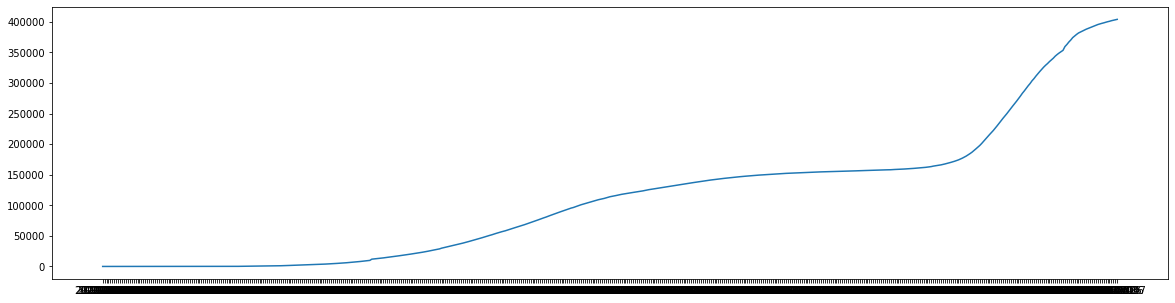

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(confirmed['ds'],confirmed['y'])

In [11]:
model=Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future_dates=model.make_future_dataframe(periods=30)
future_dates

,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
550,2021-08-02
551,2021-08-03
552,2021-08-04
553,2021-08-05


In [13]:
forecast=model.predict(future_dates)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
525,2021-07-08,419259.099845,402769.650373,434783.180607
526,2021-07-09,421893.708302,405795.974485,439147.499692
527,2021-07-10,424552.633877,407845.238335,440137.748063
528,2021-07-11,427182.627304,412596.995624,442397.289351
529,2021-07-12,429793.632184,413231.711118,445864.910745
530,2021-07-13,432352.868720,417282.891748,448638.678306
531,2021-07-14,435021.068675,418727.926651,451087.233867
532,2021-07-15,437881.177679,421410.247028,453566.867678
533,2021-07-16,440515.786137,424385.868467,456421.587884
534,2021-07-17,443174.711712,426974.444111,458883.757926


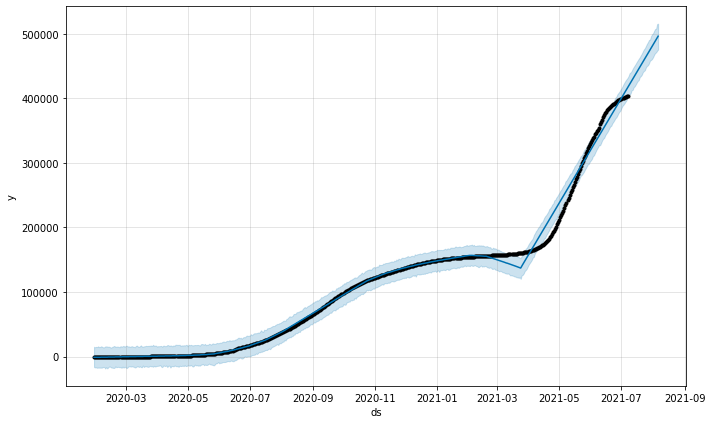

In [14]:
#ploting
confirmed_plot = model.plot(forecast)